# Monte Carlo Simulation

**If you are a Colab user**

If you use Google Colab, you can uncomment the following cell to mount your Google Drive to Colab. <br>
After that, Colab can read/write files and data in your Google Drive <br>

please change the current directory to be the folder that you save your Notebook and <br>
data folder. For example, I save my Colab files and data in the following location

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

#%cd /content/drive/MyDrive/Colab\ Notebooks

**Set up standards for the remainder of the notebook**

In [41]:
# import libraries and modules to be used
import numpy as np 
np.set_printoptions(precision=3, suppress=True)

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
from scipy import stats # we'll use the stats module of scipy

# to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Monte Carlo Simulation Method

Uncertainty pervades decision making in civil engineering systems. Decision makers are interested in risk and opportunity analysis, that is, quantifying the likelihood and magnitude of an undesirable or desired outcome. Monte Carlo simulation can be used to evaluate the impact of uncertainty on a decision. Simulation models have been successfully used in a variety of studies:
- Construction project management
- Traffic management
- Capacity planning
- Data generation
- ...

### Concept of Monte Carlo Simulation

Figure 1 illustrates the concept of Monte Carlo Simulation

- Parameters for a system which are not known with a high degree of certainty are called random, or uncertain, variables.
- A simulation model replaces the use of single values for parameters with probability distributions of possible values.
- Recall that a **probability distribution** represents not only the range of possible values but also the relative likelihood of various outcomes.
- Simulation results help make decision recommendations for the **controllable inputs** that address not only the average output but also the variability of the output.

<div style="text-align: center;">
    <img src="Figures/MCS-Concept.png" width="800"><br>
    <strong>Figure 1. Concept of Monte Carlo Simulation.</strong>
</div>

### How to Generate Random Numbers from Its Distribution?

A random variable $X$ and its cumulative distribution function $F(x)$ have a one-to-one mapping relationship. That is, any possible value of the random variable, $x$, corresponds to one and only one cumulative probability, $y=F(x)$, and any cumulative probability corresponds to one and only one value of the random variable $x$.

We can use the computer-generated random numbers from the standard continuous uniform distribution to represent values of cumulative probability $y$. We find the corresponding values of any random variable via its cumulative distribution function $y = F(x):

\begin{equation}
x = F^{-1}(y), \quad \text{for any } y\in [0, 1] \tag{1}
\end{equation}


Figure 2 illustrates how we generate random numbers from their distribution.

Let $i$ denote the index of repeated random experiments. In the $i$th random experiment, for $i=1,\dots, n$, we generate a random number $x_i$ from its distribution using the cumulative distribution function $F(x)$:
1. Generate a random number from the standard continuous uniform distribution, denoted by $y_i$, which  represents the cumulative distribution

\begin{equation}
y_i = F(x_i). \tag{2}
\end{equation}

2. The inverse of $y_i$, is the random number $x_i$:

\begin{equation}
x_i = F^{-1}(y_i). \tag{3}
\end{equation}

<div style="text-align: center;">
    <img src="Figures/MCS-RNG.png" width="600"><br>
    <strong>Figure 1. Generation of random numbers from their distribution.</strong>
</div>

### Inverse of Cumulative Distribution Function $F^{-1}(x)$

#### Discrete Random Variables

For a discrete random variable, the cumulative distribution is represented as a function of multiple intervals/steps. 

If $x_{(1)}, \dots, x_{(m)}$ are all the possible values of the random variable, ranked in an increasing order, the cumulative distribution function takes $m$ possible values $F(x_{(x)}), \dots, F(x_{(m)})=1$. The $m$ possible values of the cumulative distribution function are the upper boundaries of $m$ mutually exclusive and collectively inclusive intervals. As Figure 3 illustrates:


<div style="text-align: center;">
    <img src="Figures/MSC-DiscreteRNG.png" width="500"><br>
    <strong>Figure 1. Generation of random numbers from their distribution.</strong>
</div>

\
The inverse of the cumulative distribution function is shown below:
\begin{equation}
x_i=\left\{
\begin{aligned}
x_{(1)}, & \quad\text{if } y_i \leq F(x_{(1)})\\
x_{(2)}, & \quad\text{if } F(x_{(1)}) < y_i \leq F(x_{(2)})\\
\dots \\
x_{(m)}, & \quad y_i > \text{if } F(x_{(m-1)})\\
\end{aligned}
\right. \tag{4}
\end{equation}

For example, if a random number $y_i$ generated from the standard continuous uniform distribution falls in the interval $(F(x_{(1)}),F(x_{(2)})] $, the inverse of $y_i$ is $x_{(2)}$, according equation (4).

#### Continuous Random Variables

- For a continuous random variable that has a well-defined cumulative distribution function, the inverse of cumulative distribution can be derived. Most statistical software have provided the inverse function. 

- For a continuous random variable that only has an empirical cumulative distribution function, the inverse of cumulative distribution is obtained in the same way as for discrete random variables.


## Example: Airline Revenue Management

Sunshine Airlines is considering an overbooking policy for one of its flights. The airplane has 50 seats, but Sunshine is considering accepting more reservations than seats because sometimes passengers do not show up for their flights, resulting in empty seats. The file Airline$\_$ShowUp.csv contains data about 1,000 passengers in terms whether they showed up for their respective flights. In addition, the airline company has conducted a field experiment to gauge the demand for reservations for the current flight. During the experiment they did not limit the number of reservations for the flight to observe the demand. The file Airline$\_$Demand.csv summarizes the result of the field experiment. 


Sunshine receives a marginal profit of $\$$150 for each passenger who booked a reservation (regardless of whether they show up). Sunshine incurs a rebooking cost of $\$$500 for each passenger who books a reservation but is denied sitting due to a full airplane; and this cost results from rescheduling the passenger and any loss of goodwill. To control its rebooking costs, Sunshine wants to set a limit on the number of reservations it will accept. 

- Evaluate the Sunshine’s average net profit for three options of reservation limits: 50, 52 and 54, respectively. Based on the 95\% confidence intervals for average net profit, which reservation limited do you recommend?

- What's the chance the profit is less than $7,000 after the best overbooking policy is implemented? If the chance is greater than 10%, the company company would not implement it.


### The Revenue Model

Let’s define the inputs to the airline revenue management system:
- $D$: the demand (a random variable)
- $S$: the number of passengers showing up for the flight (a random variable)
- $C$: airplane capability (= 50)
- $L$: reservation limit (=50, 52, or 54)
- $r$: marginal profit for each booking (=$\$$150)
- $c$: rebooking cost for each overbooked passenger (=$\$$500)

Then, let's model the revenue generation:
- The number of reservations made is
\begin{equation}
\min (D, L) \tag{5}
\end{equation}

- The number of overbooked passengers is
\begin{equation}
\max(S-C, 0). \tag{6}
\end{equation}

0 The profit generated from each flight is
\begin{equation}
R(D, S; L, C, r, c) = r\min(D,L) - c \max(S-C, 0) \tag{7}
\end{equation}

There are two random inputs to the revenue management system: demand, $D$, and passengers who show up at the flight, $S$. They are modeled respectively in the following. 

### Model Random Inputs

#### The random number of passengers showing up for their flight, $S$

Whether a passenger shows up for the flight follows a Bernoulli distribution. That is, a passenger has the probability $r$ to show up and $1-r$ to not show up.
\begin{equation}
x = \left\{
\begin{aligned}
1, & \quad \text{with probability } p;\\
0, & \quad \text{with probability } 1-p.
\end{aligned}
\right. \tag{8}
\end{equation}

The file Airline$\_$ShowUp.csv provides the data for estimating this probability.

The number of passengers who will show up for the flight, $S$, is accordingly modeled as a binomial distribution:
\begin{equation}
f(s; p, \min(D, L)) = {\min(D,L) \choose s} p^{s} (1-p)^{\min(D,L)-s}. \tag{9}
\end{equation}

The cumulative distribution:
\begin{equation}
F(s) = Pr(S\leq s) =  \sum_{i=0}^s {\min(D,L) \choose i} p^{i} (1-p)^{\min(D,L)-i}. \tag{10}
\end{equation}

In [70]:
# Model the showup rate, p, based on the historical data
Airline_ShowUp = pd.read_csv("Data/Airline_ShowUp.csv")
p = Airline_ShowUp['ShowUp'].mean()
p

np.float64(0.957)

#### The random demand, $D$

The demand, $D$, is a random variable. Given the sample of historical data Airline$\_$Demand.csv, we generate the empirical frequency distribution, and so the empirical cumulative distribution:
We will use this distribution to generate random demands. 


For example, if a random number is generated from the standard continuous uniform distribution, which is equal to 0. 2351, falling  in the interval (0.1067, 0.2587], the the random demand is 50.


In [121]:
# use the demand data to model the distribution of demand
Airline_Demand = pd.read_csv("Data/Airline_Demand.csv")
temp=Airline_Demand.Demand.value_counts(normalize=True,sort=False) # the relative frequency of demand
D_model=pd.DataFrame(temp).reset_index().sort_values(by='Demand').reset_index(drop=True) # probability distribution
D_model.columns=['Demand','Prob_Dist']
D_model['Cum_Dist']=np.cumsum(D_model.Prob_Dist) # use cumsum() to find the cumulative distribution from the probability distribution
D_model

,Demand,Prob_Dist,Cum_Dist
0,48,0.062667,0.062667
1,49,0.044000,0.106667
2,50,0.152000,0.258667
3,51,0.316667,0.575333
4,52,0.250000,0.825333
5,53,0.085333,0.910667
6,54,0.089333,1.000000


### Simulation

In [75]:
## let's define model parameters that are deterministic

# Total number of trials for MC simulation
N = 1000

# Seats (capacity of the airplane, which is a parameter of system)
C = 50

# Choices of the reservation limit. 52 and 54 are cases of overbooking
L = [50, 52, 54] 

# Marginal profit of each reservation, which is a parameter
r = 150

# Penalty for compensating each overbooked passenger, which is a parameter
c = 500

In [111]:
## Simulate the revenue management system

# Simulate random demand. np.random.choice() generates N random demand with replacement 
# from its space D_model.Demand according to the probability mass function D_model.Dist
Demand_sim=np.random.choice(D_model.Demand, N, p=D_model.Prob_Dist)

# Booked reservation by assuming the reservation limit is L[0]. 
# If you chance Reserve_Limit[0] to Reserve_Limit[1] or Reserve_Limit[2], you are changing the overbooking policy (control)
Reserve_Booked = np.minimum(Demand_sim,L[0]) # if Demand_sim[i]>L[0], Reserve_Booked[i]=L[0]. Otherwise, Reserve_Booked[i]=Demand_sim[i]

# Simulate the number of passengers who will show up. If the number of booking is Reserve_Booked and the show up rate is p, how many passengers show up?
Passenger_ShowUp_sim=np.random.binomial(Reserve_Booked,p)

# Overbooking quantity
Overbooked=np.maximum(Passenger_ShowUp_sim-C,0)

# Profit is the marginal profit from reservation minus the penalty of overbooking
Profit=Reserve_Booked*r-Overbooked*c

# Summary of the simulation results from the 1000 random experiments
Reservation50_sim=pd.DataFrame({'Demand':Demand_sim, 
                                   'Reservations':Reserve_Booked, 
                                   'Showup': Passenger_ShowUp_sim, 
                                   'Overbooked': Overbooked, 
                                   'Profit': Profit}
                                 )

Reservation50_sim

,Demand,Reservations,Showup,Overbooked,Profit
0,50,50,49,0,7500
1,52,50,46,0,7500
2,51,50,46,0,7500
3,52,50,49,0,7500
4,52,50,49,0,7500
...,...,...,...,...,...
995,51,50,45,0,7500
996,53,50,49,0,7500
997,51,50,49,0,7500
998,51,50,50,0,7500


### Analyze the simulation result

The mean profit is: $7,480.8
The standard deviation of the profit is: $68.0


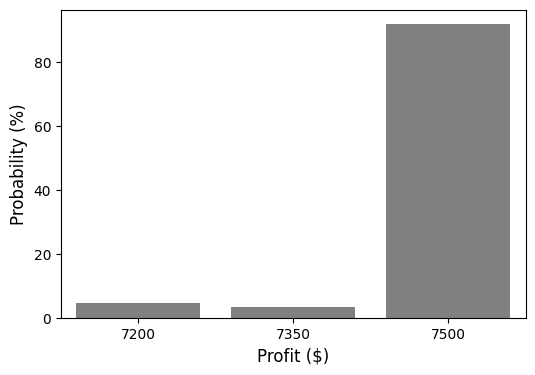

In [112]:
# visualize the distribution of profit
values,counts =np.unique(Profit,return_counts=True)

print(f'The mean profit is: ${Profit.mean():,.1f}')

print(f'The standard deviation of the profit is: ${Profit.std():,.1f}')

plt.figure(figsize=(6, 4))
sns.barplot(x=values, y=counts / sum(counts) * 100, color='grey')
plt.xlabel('Profit ($)', fontsize=12)
plt.ylabel('Probability (%)', fontsize=12)
plt.show();

### Optimization of the Reservation Limit

In [127]:
# Find the sample mean and sample standard deviation of profit at each reservation limit
Profit_comp = pd.DataFrame(index=range(0,3),columns=["reservation_limit","profit_mean","profit_std"])

for i, resv_limit in enumerate(L):
    Reserve_Booked = np.minimum(Demand_sim,resv_limit)
    Passenger_ShowUp_sim=np.random.binomial(Reserve_Booked,p)
    Overbooked=np.maximum(Passenger_ShowUp_sim-C,0)
    Profit=Reserve_Booked*r-Overbooked*c
    Profit_comp.iloc[i,]=[resv_limit, Profit.mean(), Profit.std()]

Profit_comp.map('{:,.0f}'.format)

,reservation_limit,profit_mean,profit_std
0,50,"7,481",68
1,52,"7,547",263
2,54,"7,496",335


In [134]:
# calculate the 95% confidence interval of profit for at each reservation limit

from scipy.stats import t
alpha=0.05
df = N-1
t_stat = t(df).ppf(1-alpha/2)

Profit_comp['profit_me']=Profit_comp.profit_std/np.sqrt(N)*t_stat # find the margin of error
Profit_comp['LB_95CI']=Profit_comp.profit_mean-Profit_comp.profit_me # lower boundary of 95% CI
Profit_comp['UB_95CI']=Profit_comp.profit_mean+Profit_comp.profit_me # upper boundary of 95% CI
Profit_comp.map('{:,.2f}'.format)

,reservation_limit,profit_mean,profit_std,profit_me,LB_95CI,UB_95CI
0,50.00,"7,480.80",68.02,4.22,"7,476.58","7,485.02"
1,52.00,"7,547.25",263.03,16.32,"7,530.93","7,563.57"
2,54.00,"7,495.95",334.90,20.78,"7,475.17","7,516.73"


The 95\% confidence interval of the profit at reservation limit 52 is higher than at other two limits. Therefore, the optimal reservation limit is 52.